# **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas_dedupe
import pandas_dedupe
import seaborn as sns
from scipy import stats
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Datasets**

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_id_data = pd.read_csv('Customer_ID.csv')
transaction_id_data = pd.read_csv('Transaction_ID.csv')

# **Basic Data Review**

Checking Null Values

In [3]:
def data_review(dataset,dataset_name):
  print(f'{dataset_name}')
  print(f'Shape of dataset- {dataset_name} ')
  print(dataset.shape)
  print(f'Null Values in dataset {dataset_name}')
  print(dataset.isnull().sum())
  print(dataset.head())
  print('')

In [4]:
data_review(cab_data,'Cab Data')

Cab Data
Shape of dataset- Cab Data 
(359392, 7)
Null Values in dataset Cab Data
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  



In [5]:
data_review(city_data,'City Data')

City Data
Shape of dataset- City Data 
(20, 3)
Null Values in dataset City Data
City          0
Population    0
Users         0
dtype: int64
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 



In [6]:
data_review(customer_id_data,'Customer Id Data')

Customer Id Data
Shape of dataset- Customer Id Data 
(49171, 4)
Null Values in dataset Customer Id Data
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536



In [7]:
data_review(transaction_id_data,'Transaction ID Data')

Transaction ID Data
Shape of dataset- Transaction ID Data 
(440098, 3)
Null Values in dataset Transaction ID Data
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card



In [8]:
for i in range(len(cab_data['Date of Travel'])):
   cab_data['Date of Travel'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + cab_data['Date of Travel'][i] +  - 2).strftime("%d-%m-%y")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,02-01-16,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,07-01-16,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,03-01-16,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,08-01-18,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-18,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-18,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-18,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [10]:
#replacing spaces with '_' in column names
def chng_clm_nm(dataset):
  for col in dataset.columns:
      if ' ' in col:
          dataset = dataset.rename(columns={col:col.replace(' ','_')})
  return dataset
cab_data = chng_clm_nm(cab_data)
customer_id_data = chng_clm_nm(customer_id_data)
transaction_id_data = chng_clm_nm(transaction_id_data)

In [11]:
#replacing integrs value with ',' into ints 
for col in ['Population', 'Users']:
  city_data[col] = city_data[col].str.replace(',','')
  city_data[col] = city_data[col].astype('int64')

In [12]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [13]:
cab_data['Date_of_Travel'] = pd.to_datetime(cab_data['Date_of_Travel'])
cab_data['Year'] = cab_data['Date_of_Travel'].dt.year #adding a new 'Year' column
cab_data['Month'] = cab_data['Date_of_Travel'].dt.month #adding a new 'Month' column

cab_data = cab_data.drop(['Date_of_Travel'], axis =1 )

Merging whole data

In [14]:
# Here merging data with cab_data by matching simmilar columns from each dataset to cab datset for eg. cab_data and transaction_id_dataset have same column Transaction Id
master_data = cab_data.merge(transaction_id_data, on= 'Transaction_ID').merge(customer_id_data, on ='Customer_ID').merge(city_data, on = 'City')
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
        master_data[column] = master_data[column].astype('category')

In [15]:
master_data.nunique()

Transaction_ID        359392
Company                    2
City                      19
KM_Travelled             874
Price_Charged          99176
Cost_of_Trip           16291
Year                       3
Month                     12
Customer_ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income_(USD/Month)     22725
Population                19
Users                     19
dtype: int64

# **Finding Outliers**

In [16]:
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users'] # selected columns which may have outliers

In [17]:
# making 2 dataset for pink can and yellow cab
pink_master_data = master_data[master_data['Company'] == 'Pink Cab'] 
yellow_master_data = master_data[master_data['Company'] == 'Yellow Cab']

In [18]:
# getting information from dataset with describe function
selected_pink_master_data = pink_master_data[selected_columns]
pink_cab_info = selected_pink_master_data.describe()
pink_cab_info

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [19]:
selected_yellow_master_data = yellow_master_data[selected_columns]
yellow_cab_info = selected_yellow_master_data.describe()
yellow_cab_info

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [20]:
# counting outliers for each columns
def count_outliers(dataframe_stats_info, column_name):
  q1 = dataframe_stats_info[column_name][4]
  q3 = dataframe_stats_info[column_name][6]
  iqr= q3-q1
  upper_band = q3 + 1.5*iqr
  lower_band = q1 - 1.5*iqr
  return upper_band, lower_band


In [21]:
for column_name in selected_columns :
  upper_band , lower_band = count_outliers(pink_cab_info , column_name)
  outliers = selected_pink_master_data[(selected_pink_master_data[column_name] < lower_band) | (selected_pink_master_data[column_name] > upper_band)][column_name].values
  print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))


KM_Travelled has 0 outliers : []

Price_Charged has 237 outliers : [ 902.65  870.48  896.35  901.07  869.94  891.22  901.71 1078.86  953.
  885.4   880.62  903.42  905.8   889.1  1105.72  880.57  910.33  954.04
  997.84 1021.72  983.99  870.29 1022.59  865.58  877.99 1014.03  977.81
  870.15  911.85  942.39  867.5   876.05  998.15  905.57  902.75  985.04
  904.36 1069.03  992.    884.49 1133.03  932.53 1517.15 1495.6   936.29
  894.83 1368.66 1234.24  951.53 1623.48 1319.52 1339.31 1094.02  893.57
 1172.53 1055.64 1106.11 1203.14 1045.77 1003.77  867.71  892.56 1050.27
 1359.59 1377.73 1222.2  1201.89 1122.32  956.67  881.71 1332.98  880.9
  864.94  883.72 1235.96 1020.1  1079.21  963.78  886.72  892.03  889.99
  991.19  884.69  872.03  962.44  940.66  981.86  886.06  933.06  870.21
  869.07  882.31  885.89 1016.03  883.95  950.98  931.1   951.95  884.13
  894.58  980.82  873.1  1076.93 1015.    891.93  901.16 1043.41  908.94
  952.95  937.8   919.68  999.55  920.72  954.99  891.11  8

In [22]:
for column_name in selected_columns :
  upper_band , lower_band = count_outliers(yellow_cab_info , column_name)
  outliers = selected_yellow_master_data[(selected_yellow_master_data[column_name] < lower_band) | (selected_yellow_master_data[column_name] > upper_band)][column_name].values
  print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))


KM_Travelled has 0 outliers : []

Price_Charged has 3240 outliers : [1341.17 1412.06 1540.61 ... 1282.89 1385.05 1406.5 ]

Cost_of_Trip has 0 outliers : []

Age has 0 outliers : []

Income_(USD/Month) has 0 outliers : []

Population has 0 outliers : []

Users has 0 outliers : []


Text(0, 0.5, 'Pink Cab')

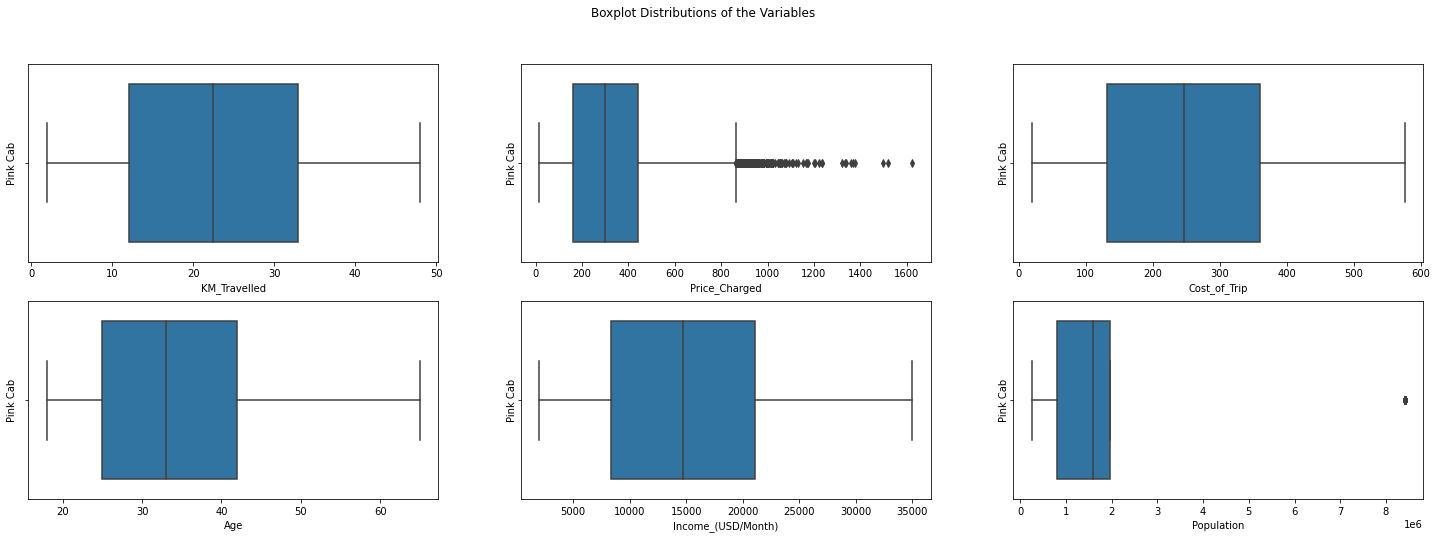

In [23]:
# visualising outlier with boxplot
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled', data=selected_pink_master_data).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged', data=selected_pink_master_data).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip', data=selected_pink_master_data).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age', data=selected_pink_master_data).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)', data=selected_pink_master_data).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,2], x='Population', data=selected_pink_master_data).set_ylabel("Pink Cab")

Text(0, 0.5, 'Yellow Cab')

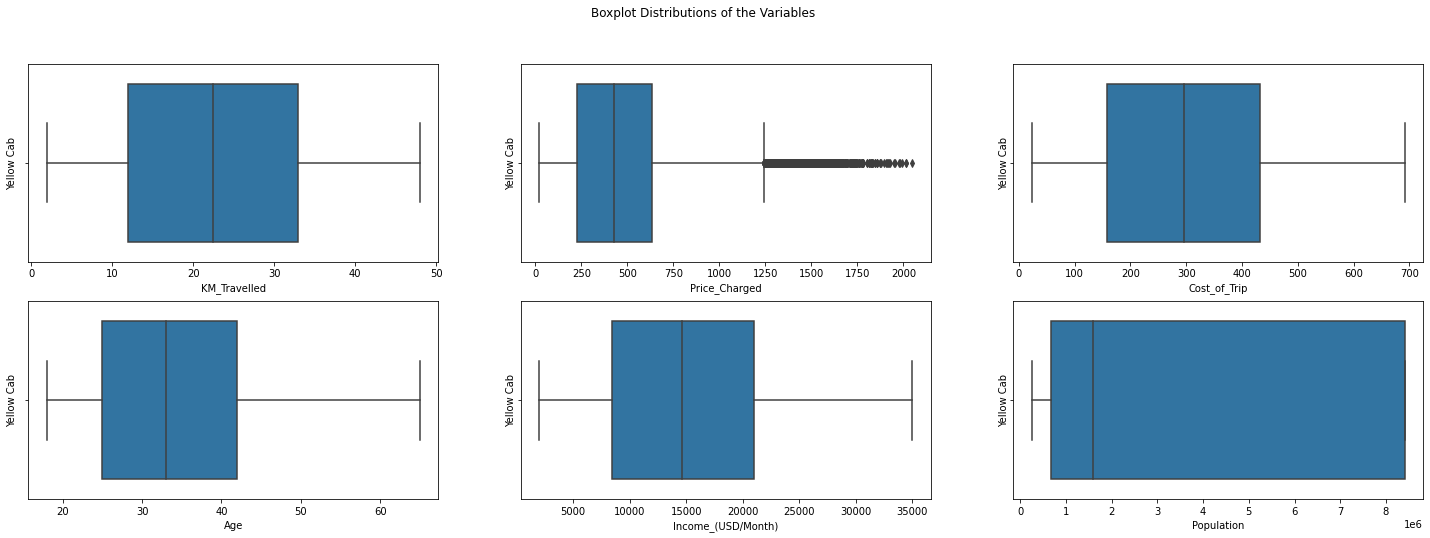

In [24]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=selected_yellow_master_data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=selected_yellow_master_data) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=selected_yellow_master_data).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=selected_yellow_master_data).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,  data=selected_yellow_master_data) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Population' ,          data=selected_yellow_master_data).set_ylabel("Yellow Cab")

# **Cheking Correlations between columns**

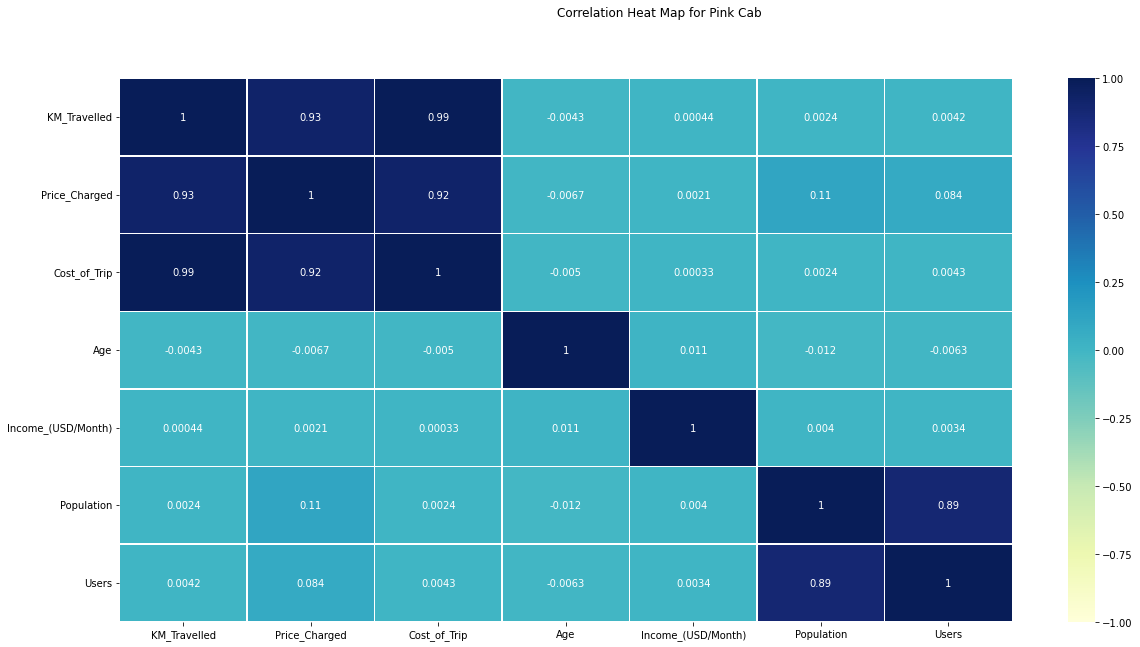

In [25]:
pink_data_corr = selected_pink_master_data.corr()
plt.figure(figsize=(20,10))
plt.suptitle('Correlation Heat Map for Pink Cab')
sns.heatmap(pink_data_corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu',linewidths=.5)

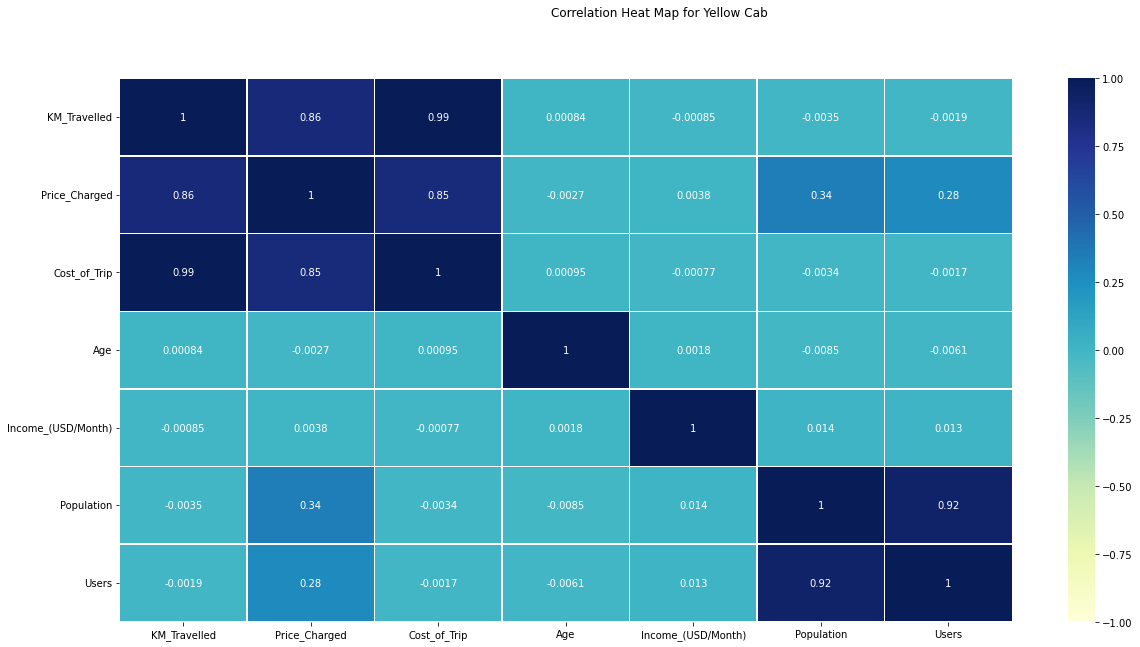

In [26]:
yellow_data_corr = selected_yellow_master_data.corr()
plt.figure(figsize=(20,10))
plt.suptitle('Correlation Heat Map for Yellow Cab')
sns.heatmap(yellow_data_corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu',linewidths=.5)

Here we can se that  some data is positively correlated with each other 
Km_Travelled - Price Charged, KM_Travelled - Cost_of_Trip, Price_Charged - Cost_of_Trip, Population - Users

In [27]:
# find coefficents and p-values of correlated data with spearman rank coefficent of whole data for above mentioned data
coeff_kt_pc = stats.spearmanr(master_data['KM_Travelled'],master_data['Price_Charged'])
coeff_kt_ct = stats.spearmanr(master_data['KM_Travelled'],master_data['Cost_of_Trip'])
coeff_pc_ct = stats.spearmanr(master_data['Price_Charged'],master_data['Cost_of_Trip'])
coeff_u_p = stats.spearmanr(master_data['Users'],master_data['Population'])

print(f'spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : {coeff_kt_pc}')
print(f'spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : {coeff_kt_ct}')
print(f'spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : {coeff_pc_ct}')
print(f'spearman rank coefficient coefficient for  Users - Population : {coeff_u_p}')

spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : SpearmanrResult(correlation=0.8929579061229219, pvalue=0.0)
spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : SpearmanrResult(correlation=0.9845458363254245, pvalue=0.0)
spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : SpearmanrResult(correlation=0.9135811393768467, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Population : SpearmanrResult(correlation=0.8742482215995742, pvalue=0.0)


In [28]:
master_data['Profit'] = master_data['Price_Charged'] -master_data['Cost_of_Trip']

In [29]:
master_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,8,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,6,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885,24701,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018,3,51406,Cash,Female,29,6829,418859,127001,143.6180
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018,4,51406,Cash,Female,29,6829,418859,127001,23.0464
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018,6,51406,Card,Female,29,6829,418859,127001,-5.8540
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018,2,51406,Cash,Female,29,6829,418859,127001,-6.0900


This proves that these columns are positively corellated

# **Visual Analysis**

Distribution of Data

In [30]:
pinkcab_data = master_data[master_data['Company'] == 'Pink Cab']
yellowcab_data = master_data[master_data['Company'] == 'Yellow Cab']

Text(0.5, 0, 'Cab Company')

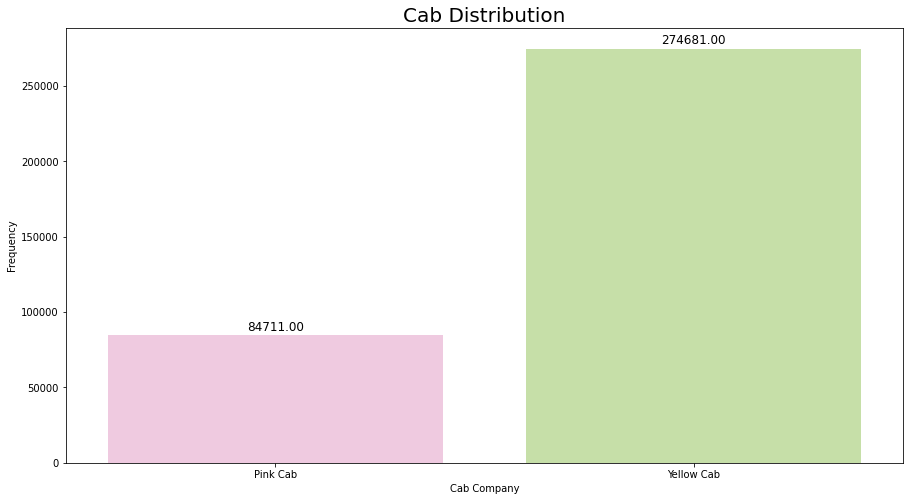

In [31]:
plt.figure(figsize=(15,8))
fig = sns.countplot(data=master_data, x="Company",palette= 'PiYG')
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Cab Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cab Company')

Profit Analysis

In [32]:
profit_city = master_data.groupby(['Profit','City','Company'])['Transaction_ID'].agg(['count'])
profit_city=profit_city.reset_index(level='Profit', col_level=1)
profit_city=profit_city.reset_index(level='City', col_level=1)
profit_city=profit_city.reset_index(level='Company', col_level=1)
profit_city = profit_city.sort_values(by='count', ascending= False )
profit_city.head()

,Company,City,Profit,count
2159127,Yellow Cab,BOSTON MA,20.25,5
1569787,Yellow Cab,CHICAGO IL,11.38,4
1358550,Pink Cab,LOS ANGELES CA,8.34,4
1835222,Pink Cab,LOS ANGELES CA,15.28,4
849204,Pink Cab,NEW YORK NY,0.56,4


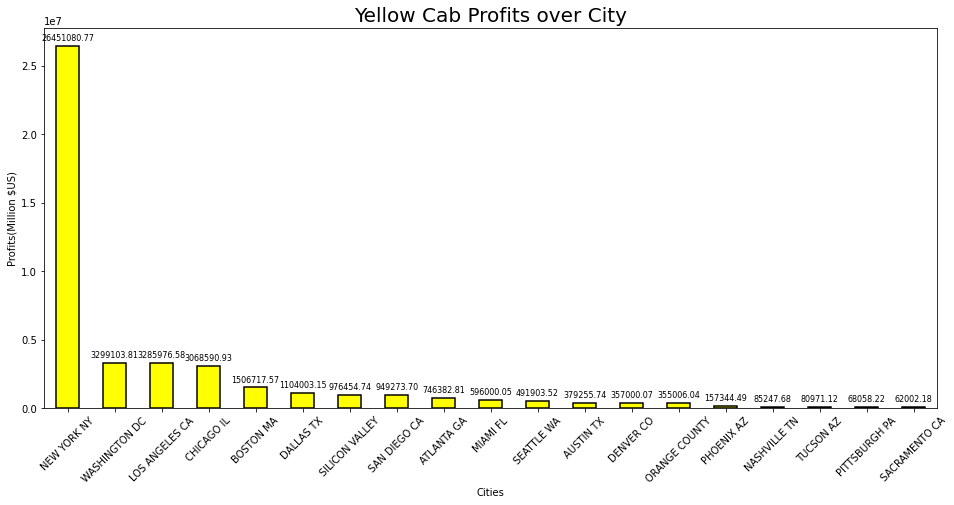

,Profit
City,
NEW YORK NY,2.645108e+07
WASHINGTON DC,3.299104e+06
LOS ANGELES CA,3.285977e+06
CHICAGO IL,3.068591e+06
BOSTON MA,1.506718e+06
DALLAS TX,1.104003e+06
SILICON VALLEY,9.764547e+05
SAN DIEGO CA,9.492737e+05
ATLANTA GA,7.463828e+05


In [33]:
# profit per city
# yellow cabs
ppc_y= yellowcab_data.groupby('City').Profit.sum()
ppc_y= pd.DataFrame(ppc_y)
ppc_y = ppc_y.sort_values(by='Profit', ascending= False )
ppc_y.head()

plt.figure(figsize=(16,7))
fig= ppc_y.Profit.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Profits(Million $US)')
plt.xlabel('Cities')
plt.title('Yellow Cab Profits over City',fontsize=20)
plt.show()
ppc_y

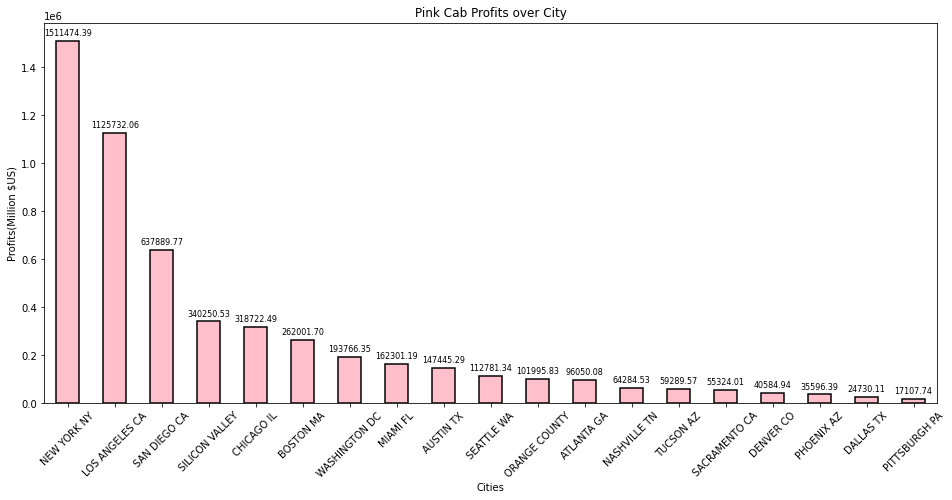

,Profit
City,
NEW YORK NY,1511474.388
LOS ANGELES CA,1125732.065
SAN DIEGO CA,637889.769
SILICON VALLEY,340250.531
CHICAGO IL,318722.488
BOSTON MA,262001.698
WASHINGTON DC,193766.353
MIAMI FL,162301.191
AUSTIN TX,147445.290


In [34]:
# pink cab
ppc_p= pinkcab_data.groupby('City').Profit.sum()
ppc_p= pd.DataFrame(ppc_p)
ppc_p = ppc_p.sort_values(by='Profit', ascending= False )
ppc_p.head()

plt.figure(figsize=(16,7))
fig= ppc_p.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel('Profits(Million $US)')
plt.xlabel('Cities')
plt.title('Pink Cab Profits over City')
plt.show()
ppc_p

Text(0.5, 0, 'City')

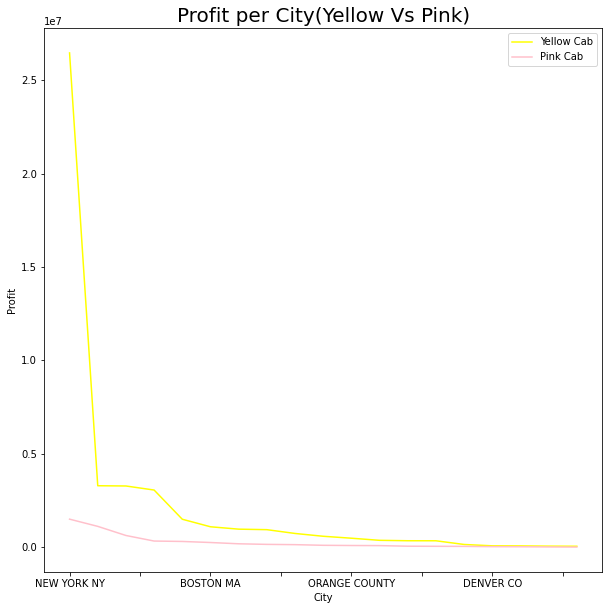

In [35]:
plt.figure(figsize=(10,10))
fig1= ppc_y.Profit.plot.line(color = 'yellow',linewidth=1.5)
fig2= ppc_p.Profit.plot.line(color = 'pink',linewidth=1.5)
plt.title('Profit per City(Yellow Vs Pink)', fontsize=20)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.ylabel('Profit')
plt.xlabel('City')

In [36]:
# profit company wise
profit_company = master_data.groupby('Company').Profit.sum()


In [37]:
profit_company = pd.DataFrame(profit_company)

In [38]:
profit_company

,Profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


Text(0.5, 0, 'Cab Company')

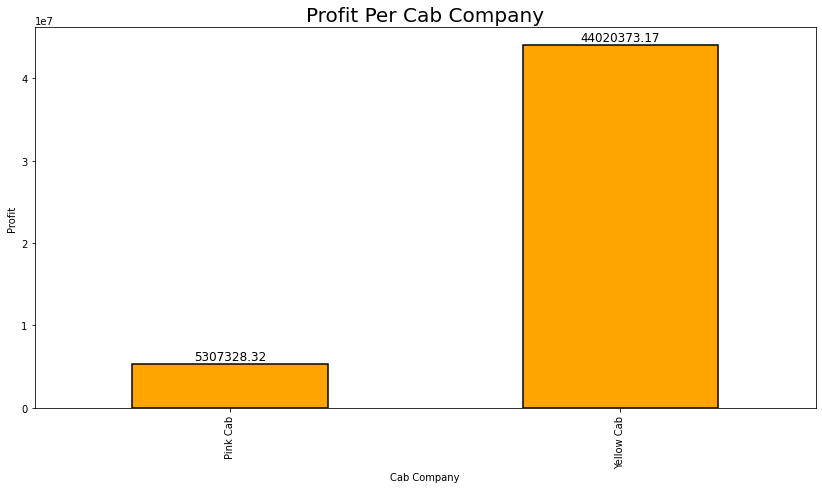

In [39]:
plt.figure(figsize=(14,7))
fig= profit_company.Profit.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit Per Cab Company', fontsize=20)
plt.ylabel('Profit')
plt.xlabel('Cab Company')

In [40]:
# profit per kilometer
master_data["Profit_per_KM"] = master_data["Profit"] / master_data["KM_Travelled"]
city_ppk = master_data.groupby(["City",'Company'])["Profit_per_KM"].mean()
city_ppk = pd.DataFrame(city_ppk)
city_ppk

Profit_per_KM
City           Company                  
ATLANTA GA     Pink Cab         2.418367
               Yellow Cab       5.793907
AUSTIN TX      Pink Cab         3.601619
               Yellow Cab       5.573738
BOSTON MA      Pink Cab         2.234623
               Yellow Cab       2.724566
CHICAGO IL     Pink Cab         1.508437
               Yellow Cab       2.862147
DALLAS TX      Pink Cab         0.825393
               Yellow Cab       8.659813
DENVER CO      Pink Cab         1.276010
               Yellow Cab       6.538332
LOS ANGELES CA Pink Cab         2.501389
               Yellow Cab       5.143755
MIAMI FL       Pink Cab         3.601181
               Yellow Cab       5.876724
NASHVILLE TN   Pink Cab         1.521093
               Yellow Cab       3.199816
NEW YORK NY    Pink Cab         4.790525
               Yellow Cab      13.680714
ORANGE COUNTY  Pink Cab         3.008943
               Yellow Cab       6.439300
PHOENIX AZ     Pink Cab         1.894585
               Yellow Cab       5.825460
PITTSBURGH PA  Pink Cab         1.066107
               Yellow Cab       4.610267
SACRAMENTO CA  Pink Cab         1.815109
               Yellow Cab       2.608064
SAN DIEGO CA   Pink Cab         2.638450
               Yellow Cab       4.306747
SEATTLE WA     Pink Cab         1.825484
               Yellow Cab       4.133996
SILICON VALLEY Pink Cab         3.898292
               Yellow Cab       9.046897
TUCSON AZ      Pink Cab         3.267249
               Yellow Cab       3.156657
WASHINGTON DC  Pink Cab         2.308069
               Yellow Cab       3.633461

Text(0.5, 0, 'Cab Company')

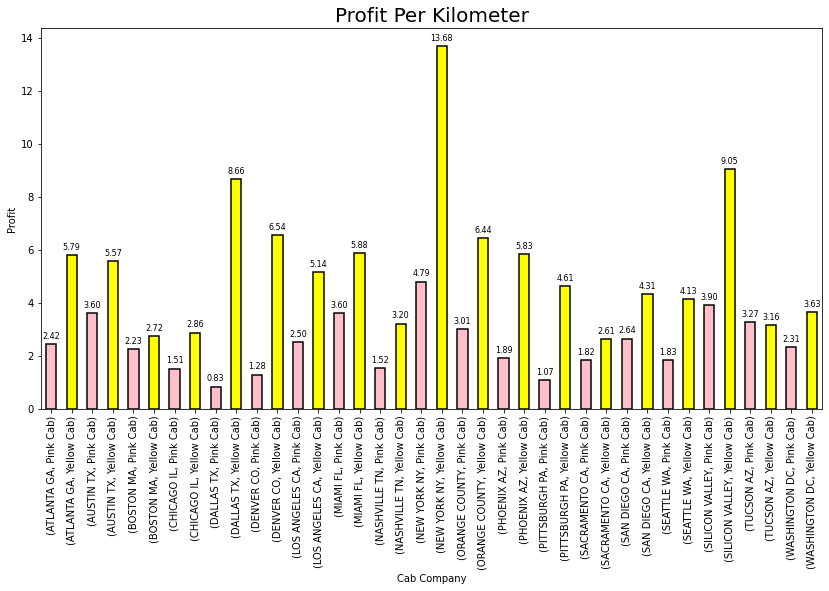

In [41]:
plt.figure(figsize=(14,7))
fig= city_ppk.Profit_per_KM.plot.bar(color = ['Pink','Yellow']*20,edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit Per Kilometer', fontsize=20)
plt.ylabel('Profit')
plt.xlabel('Cab Company')

In [42]:
ppk_avg = master_data.groupby(['Company'])["Profit_per_KM"].mean()


In [43]:
ppk_avg = pd.DataFrame(ppk_avg)

Text(0.5, 0, 'Cab Company')

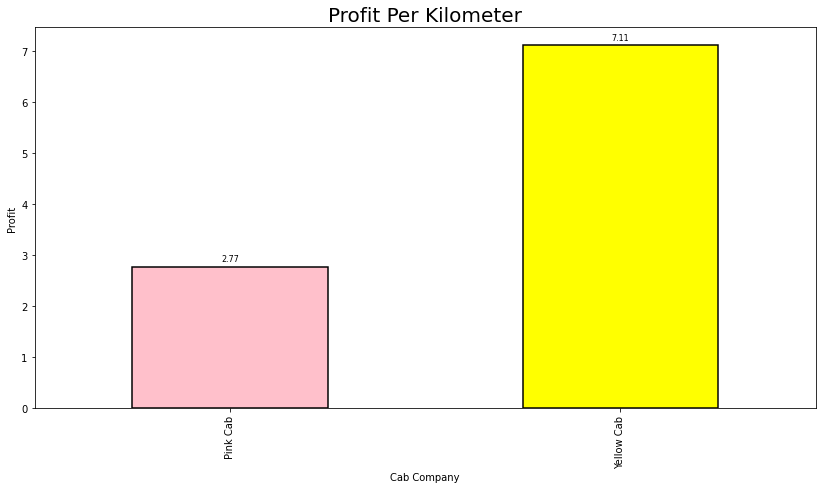

In [44]:
plt.figure(figsize=(14,7))
fig= ppk_avg.Profit_per_KM.plot.bar(color = ['Pink','Yellow'],edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit Per Kilometer', fontsize=20)
plt.ylabel('Profit')
plt.xlabel('Cab Company')

In [45]:
# monthly profit
profit_month = master_data.groupby("Month")["Profit"].sum()
profit_month = pd.DataFrame(profit_month)
profit_month

,Profit
Month,
1,3.263800e+06
2,3.461104e+06
3,3.991813e+06
4,3.484673e+06
5,4.379572e+06
6,3.998237e+06
7,3.776329e+06
8,3.709845e+06
9,4.558407e+06


Text(0.5, 0, 'Month')

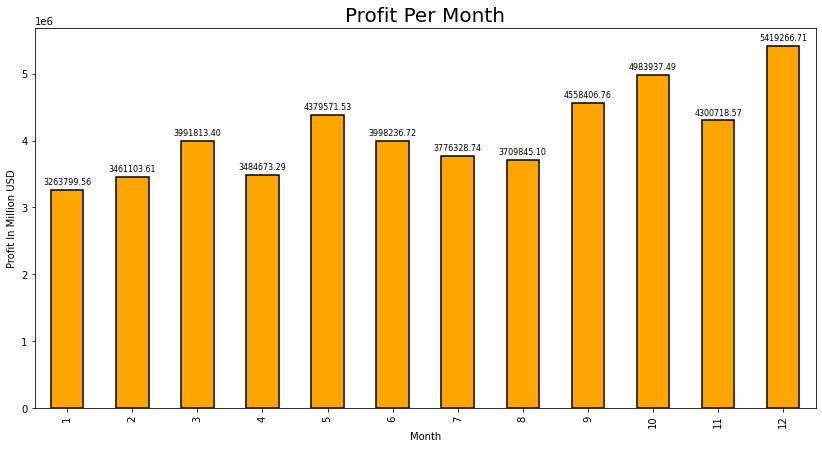

In [46]:
plt.figure(figsize=(14,7))
fig= profit_month.Profit.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit Per Month', fontsize=20)
plt.ylabel('Profit In Million USD')
plt.xlabel('Month')

In [47]:
profit_month_yellow = yellowcab_data.groupby("Month")["Profit"].sum()
profit_month_yellow = pd.DataFrame(profit_month_yellow)
profit_month_pink = pinkcab_data.groupby("Month")["Profit"].sum()
profit_month_pink = pd.DataFrame(profit_month_pink)

Text(0.5, 0, 'Month')

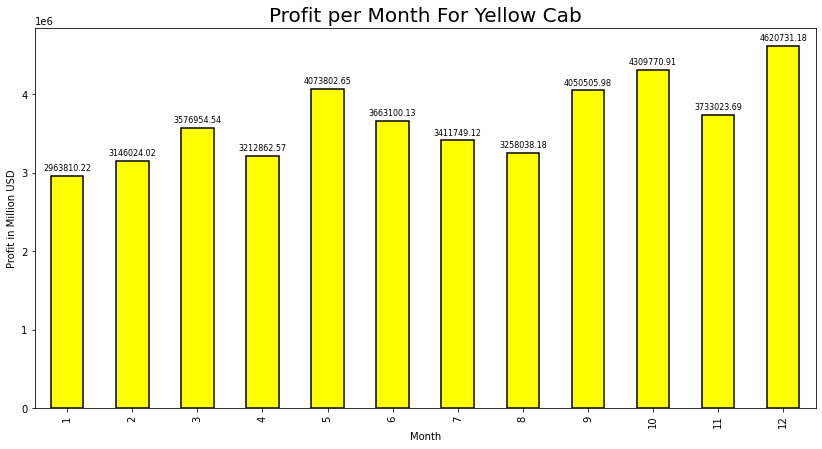

In [48]:
plt.figure(figsize=(14,7))
fig= profit_month_yellow.Profit.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit per Month For Yellow Cab', fontsize=20)
plt.ylabel('Profit in Million USD')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

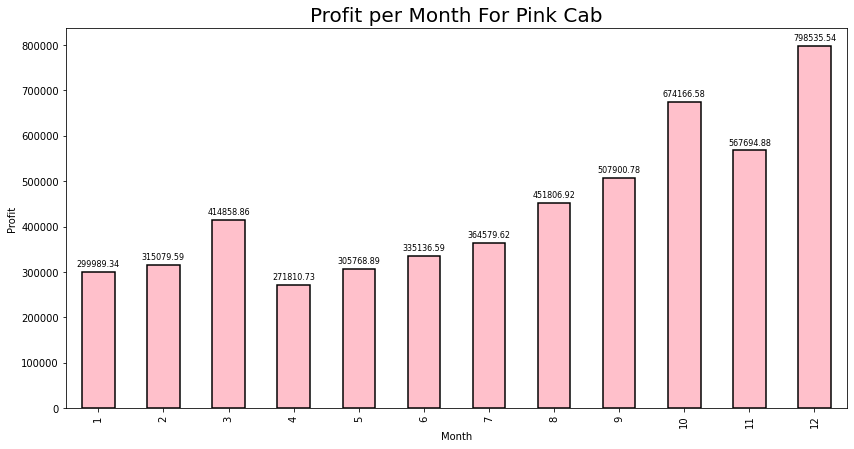

In [49]:
plt.figure(figsize=(14,7))
fig= profit_month_pink.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit per Month For Pink Cab', fontsize=20)
plt.ylabel('Profit')
plt.xlabel('Month')

Text(0.5, 0, 'Months')

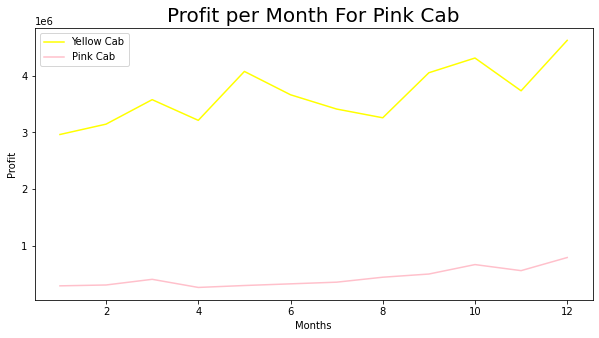

In [50]:
plt.figure(figsize=(10,5))
fig1= profit_month_yellow.Profit.plot.line(color = 'yellow',linewidth=1.5)
fig2= profit_month_pink.Profit.plot.line(color = 'pink',linewidth=1.5)
plt.title('Profit per Month For Pink Cab', fontsize=20)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.ylabel('Profit')
plt.xlabel('Months')

In [51]:
# yearly profit
profit_year = master_data.groupby("Year")["Profit"].sum()
profit_year = pd.DataFrame(profit_year)
profit_year

,Profit
Year,
2016,1.564051e+07
2017,1.860963e+07
2018,1.507756e+07


Text(0.5, 0, 'Year')

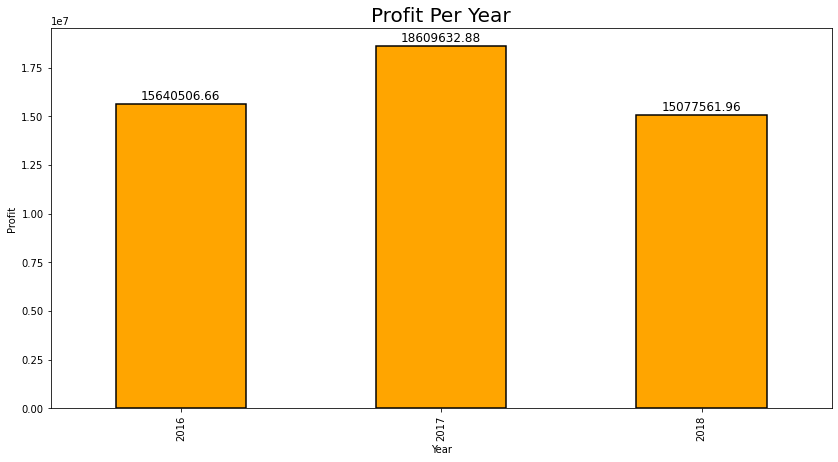

In [52]:
plt.figure(figsize=(14,7))
fig= profit_year.Profit.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit Per Year', fontsize=20)
plt.ylabel('Profit')
plt.xlabel('Year')

In [53]:
profit_year_yellow = yellowcab_data.groupby("Year")["Profit"].sum()
profit_year_yellow = pd.DataFrame(profit_year_yellow)
profit_year_pink = pinkcab_data.groupby("Year")["Profit"].sum()
profit_year_pink = pd.DataFrame(profit_year_pink)

Text(0.5, 0, 'Year')

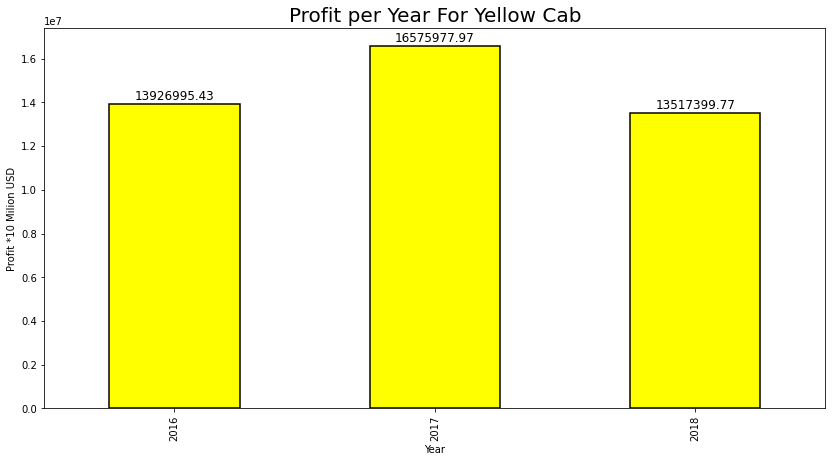

In [54]:
plt.figure(figsize=(14,7))
fig= profit_year_yellow.Profit.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit per Year For Yellow Cab', fontsize=20)
plt.ylabel('Profit *10 Milion USD')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

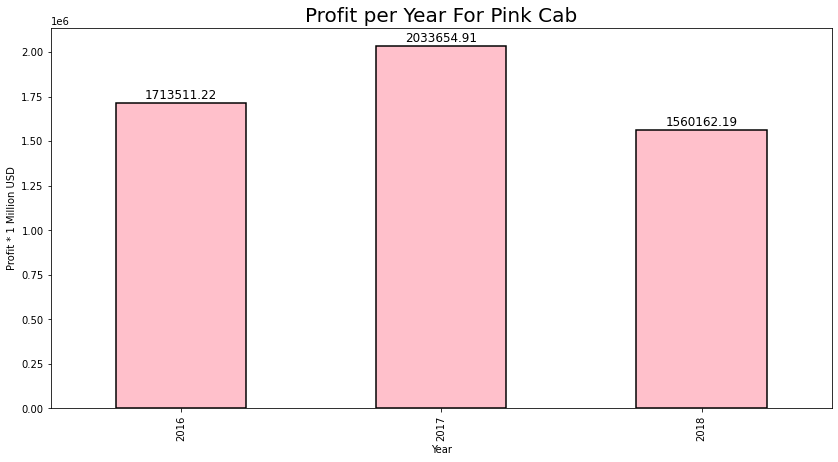

In [55]:
plt.figure(figsize=(14,7))
fig= profit_year_pink.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Profit per Year For Pink Cab', fontsize=20)
plt.ylabel('Profit * 1 Million USD')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

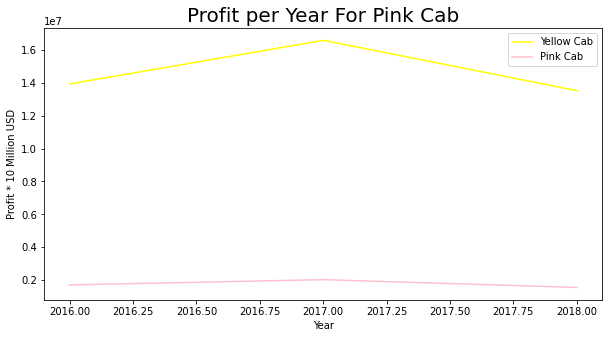

In [56]:
plt.figure(figsize=(10,5))
fig1= profit_year_yellow.Profit.plot.line(color = 'yellow',linewidth=1.5)
fig2= profit_year_pink.Profit.plot.line(color = 'pink',linewidth=1.5)
plt.title('Profit per Year For Pink Cab', fontsize=20)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.ylabel('Profit * 10 Million USD')
plt.xlabel('Year')

Users Wise Analysis

In [57]:
user_city_yellow = yellowcab_data.groupby("City")["Users"].count()
user_city_yellow = pd.DataFrame(user_city_yellow)
user_city_pink = pinkcab_data.groupby("City")["Users"].count()
user_city_pink = pd.DataFrame(user_city_pink)

Text(0.5, 0, 'City')

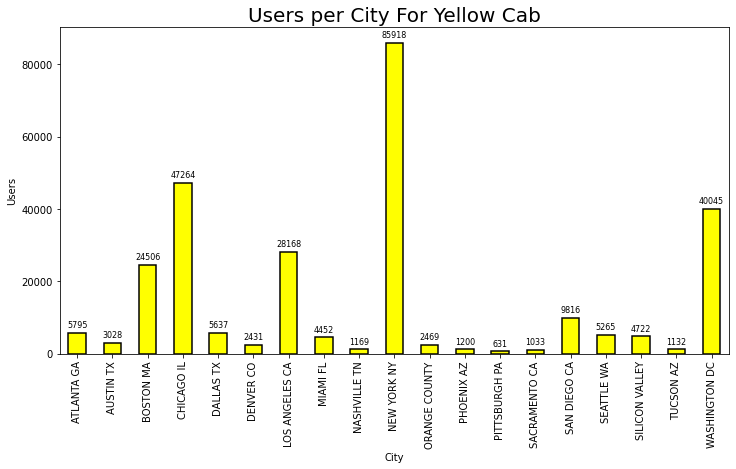

In [58]:
plt.figure(figsize=(12,6))
fig= user_city_yellow.Users.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per City For Yellow Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('City')

Text(0.5, 0, 'City')

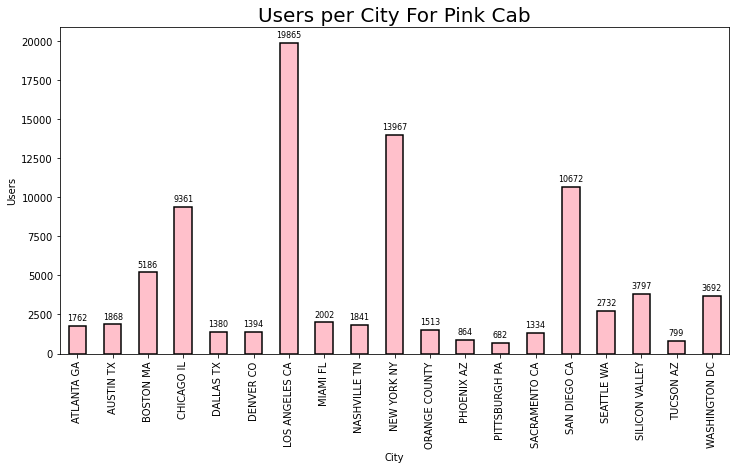

In [59]:
plt.figure(figsize=(12,6))
fig= user_city_pink.Users.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per City For Pink Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('City')

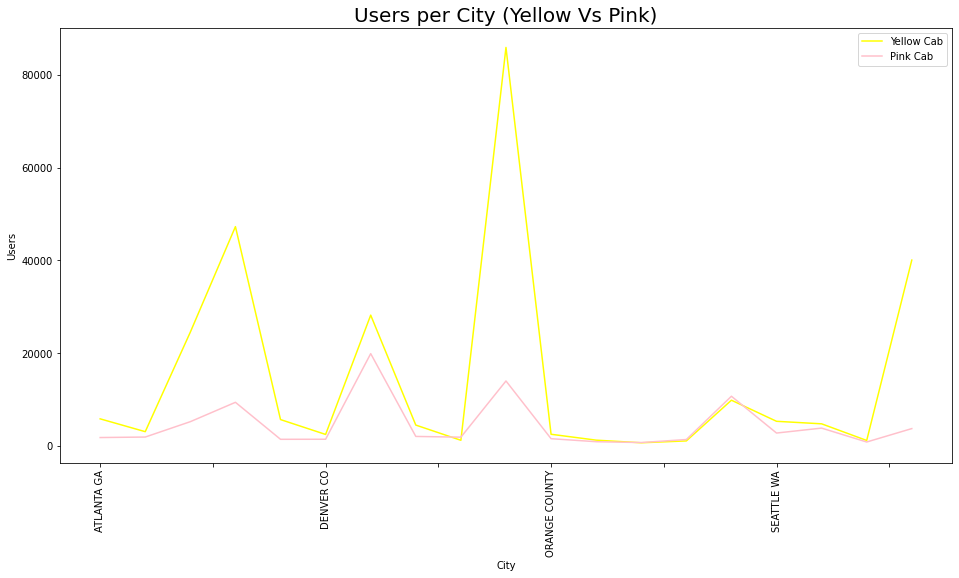

In [60]:
plt.figure(figsize=(16,8))
fig1= user_city_yellow.Users.plot.line(color = 'yellow',linewidth=1.5)
fig2= user_city_pink.Users.plot.line(color = 'pink',linewidth=1.5)
plt.xticks(rotation='vertical')
#plt.margins(0.2)
plt.title('Users per City (Yellow Vs Pink)', fontsize=20)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.ylabel('Users')
plt.xlabel('City')
plt.show()

In [61]:
user_month_yellow = yellowcab_data.groupby("Month")["Users"].count()
user_month_yellow = pd.DataFrame(user_month_yellow)
user_month_pink = pinkcab_data.groupby("Month")["Users"].count()
user_month_pink = pd.DataFrame(user_month_pink)

Text(0.5, 0, 'Month')

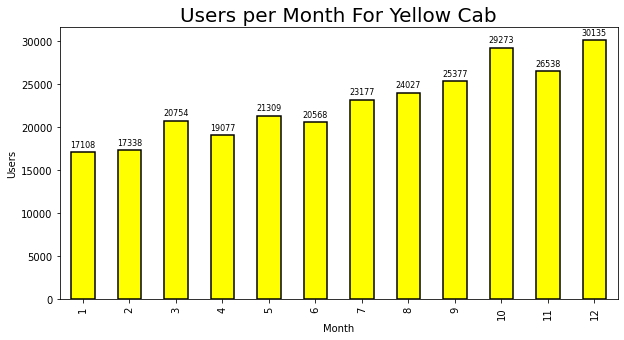

In [62]:
plt.figure(figsize=(10,5))
fig= user_month_yellow.Users.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per Month For Yellow Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

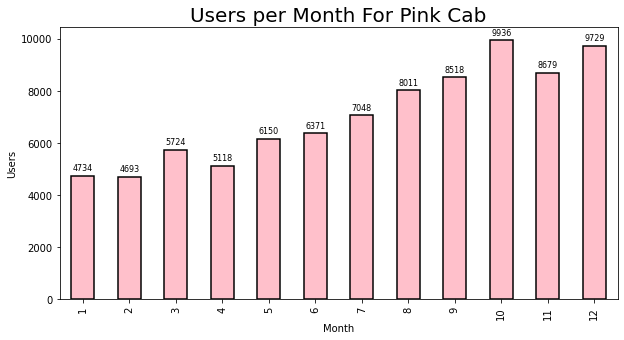

In [63]:
plt.figure(figsize=(10,5))
fig= user_month_pink.Users.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per Month For Pink Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('Month')

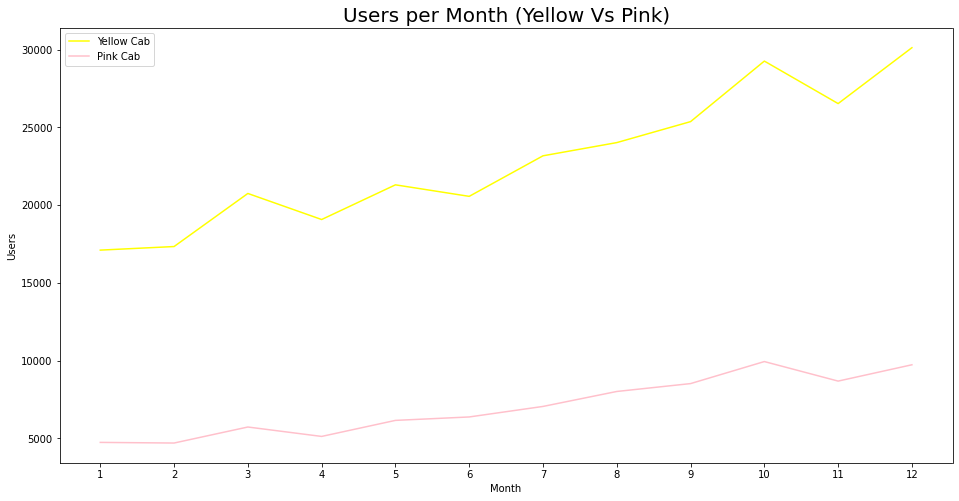

In [64]:
plt.figure(figsize=(16,8))
fig1= user_month_yellow.Users.plot.line(color = 'yellow',linewidth=1.5,)
fig2= user_month_pink.Users.plot.line(color = 'pink',linewidth=1.5)
plt.title('Users per Month (Yellow Vs Pink)', fontsize=20)
plt.xticks(np.arange(1, 13, step=1))
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.ylabel('Users')
plt.xlabel('Month')
plt.show()

In [65]:
# user with payment method
user_payment = master_data.groupby("Payment_Mode")["Users"].count()

In [66]:
user_payment = pd.DataFrame(user_payment)

Text(0.5, 0, 'Payment Mode')

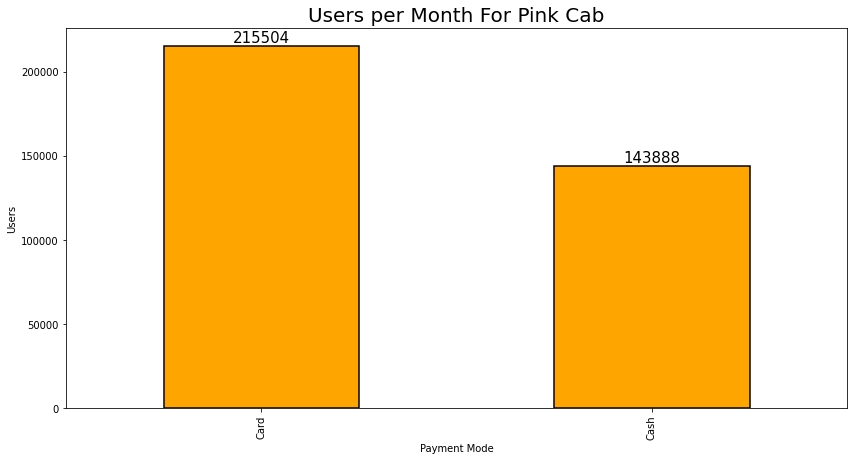

In [67]:
plt.figure(figsize=(14,7))
fig= user_payment.Users.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per Month For Pink Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('Payment Mode')

In [68]:
# user with gender ration 
user_gender = master_data.groupby("Gender")["Users"].count()

In [69]:
user_gender = pd.DataFrame(user_gender)

Text(0.5, 0, 'Gender')

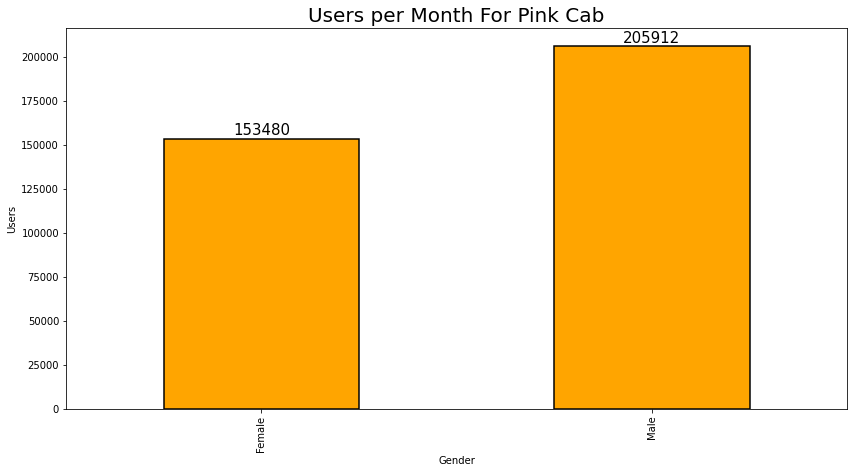

In [70]:
plt.figure(figsize=(14,7))
fig= user_gender.Users.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per Month For Pink Cab', fontsize=20)
plt.ylabel('Users')
plt.xlabel('Gender')

In [71]:
age_1=pinkcab_data[(pinkcab_data['Age']>=18) & (pinkcab_data['Age']<25)]
age_2=pinkcab_data[(pinkcab_data['Age']>=25) & (pinkcab_data['Age']<40)]
age_3=pinkcab_data[(pinkcab_data['Age']>=40) & (pinkcab_data['Age']<=65)]
age_1= age_1.groupby(['Age','Company'])['Users'].agg(['count'])
age_1['Class']= '18-25'
age_2= age_2.groupby(['Age','Company'])['Users'].agg(['count'])
age_2['Class']= '26-40'
age_3= age_3.groupby(['Age','Company'])['Users'].agg(['count'])
age_3['Class']= '40-65'
agegroup=age_1
agegroup=pd.concat([agegroup,age_2,age_3])
pinkcab_agegroup = agegroup.groupby("Class")["count"].sum()
pinkcab_agegroup = pd.DataFrame(pinkcab_agegroup)

In [72]:
age_1=yellowcab_data[(yellowcab_data['Age']>=18) & (yellowcab_data['Age']<25)]
age_2=yellowcab_data[(yellowcab_data['Age']>=25) & (yellowcab_data['Age']<40)]
age_3=yellowcab_data[(yellowcab_data['Age']>=40) & (yellowcab_data['Age']<=65)]
age_1= age_1.groupby(['Age','Company'])['Users'].agg(['count'])
age_1['Class']= '18-25'
age_2= age_2.groupby(['Age','Company'])['Users'].agg(['count'])
age_2['Class']= '26-40'
age_3= age_3.groupby(['Age','Company'])['Users'].agg(['count'])
age_3['Class']= '40-65'
agegroup=age_1
agegroup=pd.concat([agegroup,age_2,age_3])
yellowcab_agegroup = agegroup.groupby("Class")["count"].sum()
yellowcab_agegroup = pd.DataFrame(yellowcab_agegroup)

Text(0.5, 0, 'Age Group')

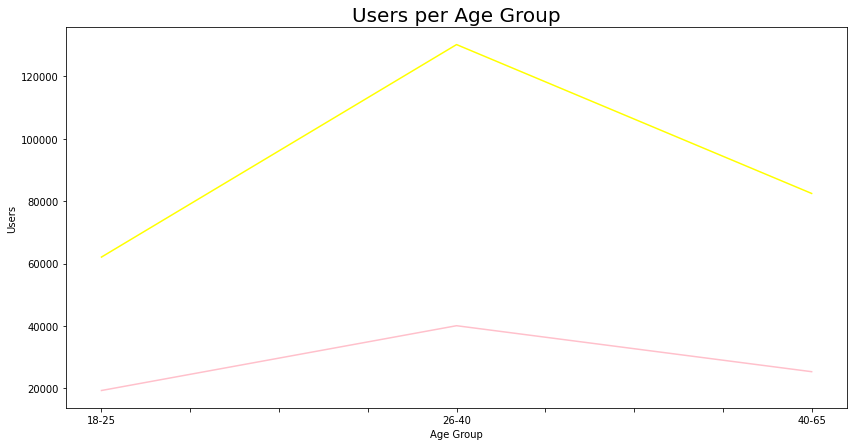

In [73]:
plt.figure(figsize=(14,7))
fig1= pinkcab_agegroup['count'].plot.line(color = 'pink',linewidth=1.5)
fig2= yellowcab_agegroup['count'].plot.line(color = 'yellow',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Users per Age Group', fontsize=20)
plt.ylabel('Users')
plt.xlabel('Age Group')

In [74]:
users_city = master_data.groupby(['City'])['Users'].mean()
users_city = pd.DataFrame(users_city)
population_city = master_data.groupby(['City'])['Population'].mean()
population_city = pd.DataFrame(population_city)

In [75]:
pp_user = users_city.merge(population_city, on= 'City')

In [76]:
pp_user['PPU'] = (pp_user.Users*100)/pp_user.Population

Text(0.5, 0, 'City')

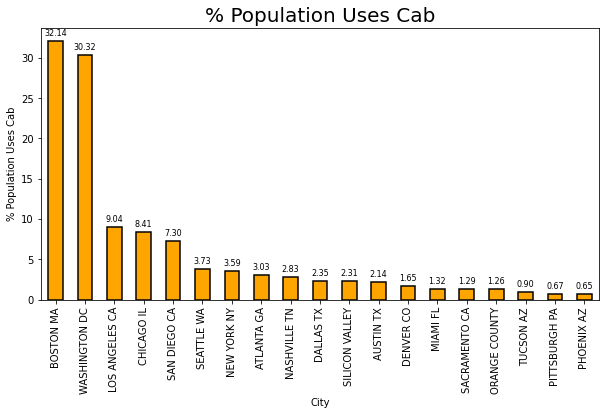

In [77]:
plt.figure(figsize=(10,5))
pp_user = pp_user.sort_values(by='PPU', ascending= False )
fig= pp_user.PPU.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('% Population Uses Cab', fontsize=20)
plt.ylabel('% Population Uses Cab')
plt.xlabel('City')

Text(0.5, 0, 'City')

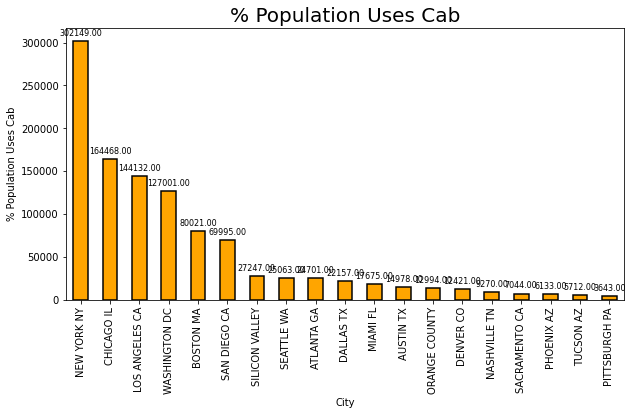

In [78]:
plt.figure(figsize=(10,5))
users_city = users_city.sort_values(by='Users', ascending= False )
fig= users_city.Users.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('% Population Uses Cab', fontsize=20)
plt.ylabel('% Population Uses Cab')
plt.xlabel('City')

In [79]:
company_year = master_data.groupby(['Year','Company'])['Transaction_ID'].count()
company_year = pd.DataFrame(company_year)

Text(0.5, 0, 'Year and Cab Company')

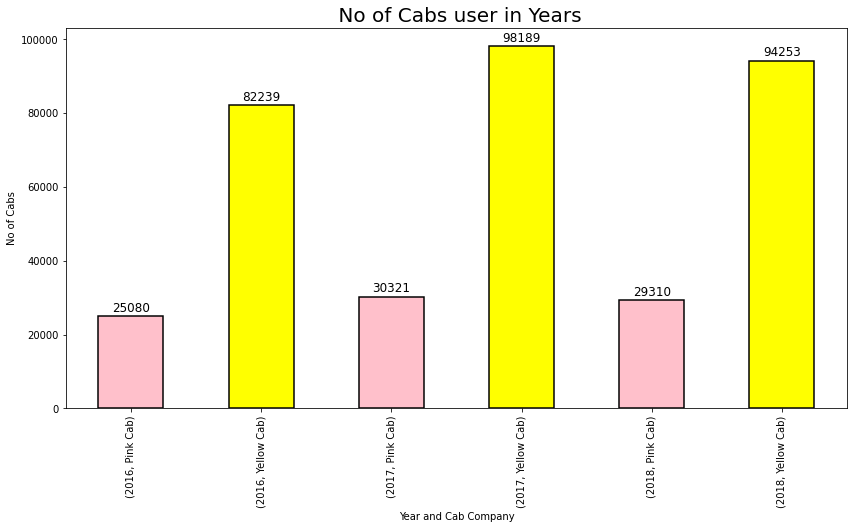

In [80]:
plt.figure(figsize=(14,7))
fig= company_year.Transaction_ID.plot.bar(color =['pink', 'yellow']*3,edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(' No of Cabs user in Years', fontsize=20)
plt.ylabel('No of Cabs')
plt.xlabel('Year and Cab Company')

In [81]:
company_month = master_data.groupby(['Month','Company'])['Transaction_ID'].count()
company_month = pd.DataFrame(company_month)

Text(0.5, 0, 'Month and Cab Company')

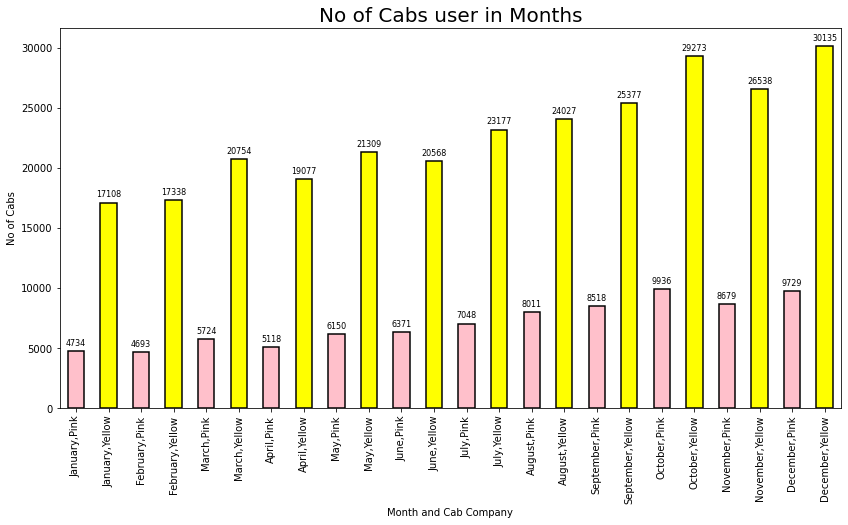

In [82]:
plt.figure(figsize=(14,7))
fig= company_month.Transaction_ID.plot.bar(color =['pink', 'yellow']*12,edgecolor='black',linewidth=1.5)
for bar in fig.patches:
  fig.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
      
                   textcoords='offset points')
plt.xticks(np.arange(24), ['January,Pink','January,Yellow','February,Pink','February,Yellow','March,Pink','March,Yellow','April,Pink','April,Yellow','May,Pink','May,Yellow','June,Pink','June,Yellow','July,Pink','July,Yellow','August,Pink','August,Yellow','September,Pink','September,Yellow','October,Pink','October,Yellow','November,Pink','November,Yellow','December,Pink','December,Yellow'])
plt.title('No of Cabs user in Months', fontsize=20)
plt.ylabel('No of Cabs')
plt.xlabel('Month and Cab Company')

I have evaluated both the cab companies on different points where i found belove results:

Profit Analysis:
- Profit Per Cab Company Overall: Yellow Cab has almost 9 times more profit than pink cab.
- Profit per City : Yellow Cab has more profit in every city than Pink Cab.
- Profit Per Kilometer : Yellow Cab has more profit per kilometer in all cities than Pink Cab.Also, Overall Yellow cab has almost 3 times more profit per KM than Pink Cab. 
- Profit Per Month and Year : Yellow Cab has alsmost 10 times more profit per all months than pink cab. Moreover, Yellow Cab has alsmost 7-8 times more profit per year than pink cab.

Customer Reach:
- Customers Reach in Cities: Pink Cab has more Customer reach tha Yellow cab in only 4 cities.
- Customers Reach Time wise : Yellow cab has certainly higher customer reach than pinki cab in every month of all three years observed.
- Customer Reach Age wise: Yellow Cab has better customer reach for evry age group than Pink Cab 
- Customer Reach Gender Wise : Both the Gender prefer Yellow Cabs more than Pink Cabs.

Recommendation:

*   Based on above analysis i wil recommend you to use Yellow cabs than Pink Cabs as Yellow Cab has dominated in all the areas wheather it is Profit or Customer Reach.

Other Analysis and Recommendation:
- Boston, Los Angeles, Washington DC, Chicago and San Diego are cities with most percentage of population use the cab services. But New York has more number of users as compare to other cities because of its high population. So implementing cab system in these cities will be more benificial.
- Around 2/3 cab users prefer to pay the cab bills with card than cash. So, i would highly recomend you to enable card payment method.  
- Also both cabs are used more in later part of the year. So, i would recomend you to run cab services at full potential pssible in 2nd and 3rd quater of the year.